# Data Science & Machine Learning
### Sandip Mahesh Randive                                  
### Email_id                                : sandiprandive75@gmail.com
### whatsapp_number                  : 9096548359

## Importing Standard Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
%matplotlib inline

## Importing Dataset

In [2]:
data = pd.read_csv('D:/Internshala/Fraud.csv')

In [3]:
#preview dataset
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Data Preprocessing & Exploratory Data Analysis

In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
#checking for null values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
#show all columns
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
#getting unique features from categorical data
print(f'Total Number Of Unique Values present in Type Column : {data.type.unique()}')
print(f'Total Number Of Unique Values present in isFraud Column : {data.isFraud.unique()}')

Total Number Of Unique Values present in Type Column : ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
Total Number Of Unique Values present in isFraud Column : [0 1]


In [10]:
#removing unnecessary columns
data.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1, inplace = True)

## Relation Between independent features and dependant features

In [11]:
numeric_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
categorical_features = ['step', 'type']

In [12]:
group = data.groupby(['isFraud', 'type'])
group.count()

step   amount  oldbalanceOrg  newbalanceOrig  \
isFraud type                                                        
0       CASH_IN   1399284  1399284        1399284         1399284   
        CASH_OUT  2233384  2233384        2233384         2233384   
        DEBIT       41432    41432          41432           41432   
        PAYMENT   2151495  2151495        2151495         2151495   
        TRANSFER   528812   528812         528812          528812   
1       CASH_OUT     4116     4116           4116            4116   
        TRANSFER     4097     4097           4097            4097   

                  oldbalanceDest  newbalanceDest  
isFraud type                                      
0       CASH_IN          1399284         1399284  
        CASH_OUT         2233384         2233384  
        DEBIT              41432           41432  
        PAYMENT          2151495         2151495  
        TRANSFER          528812          528812  
1       CASH_OUT            4116            4116  
        TRANSFER            4097            4097

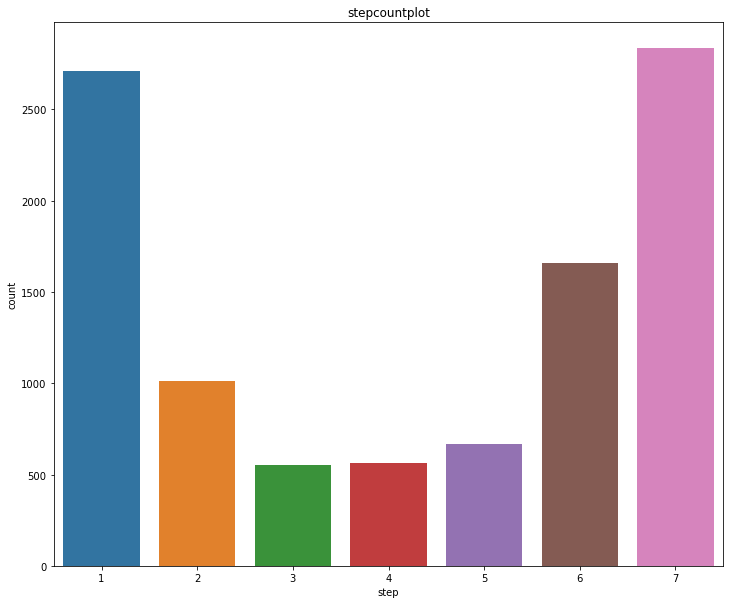

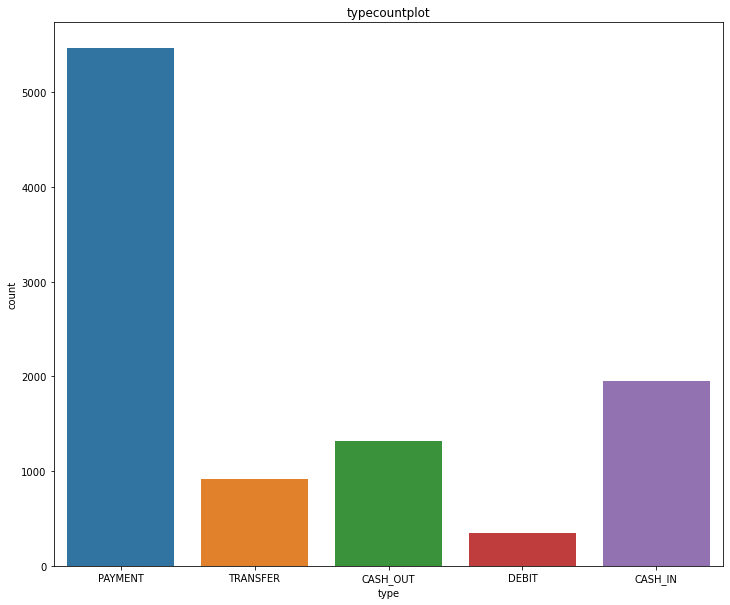

In [46]:
#Plotting count plot according to category 
for feature in categorical_features:
    plt.figure(figsize = (12, 10))
    sns.countplot(feature,data = data.head(10000))
    plt.title(feature + 'countplot')
    plt.show()

## Distribustion of Continuous Features

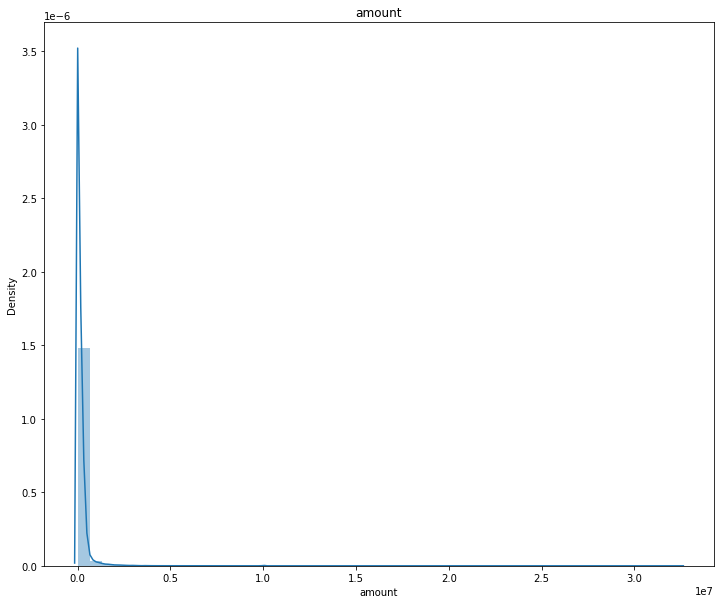

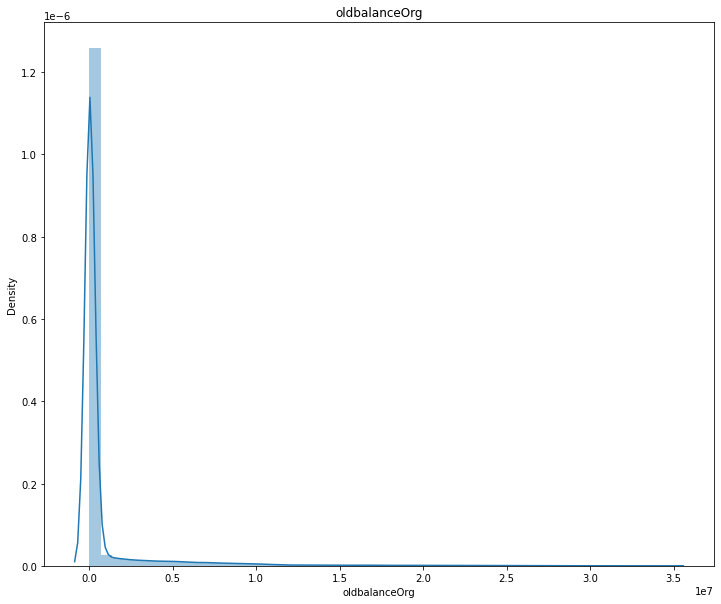

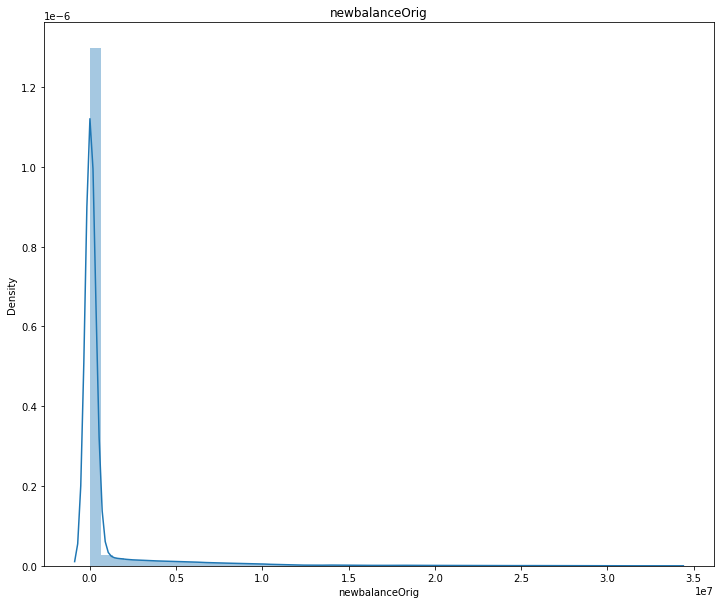

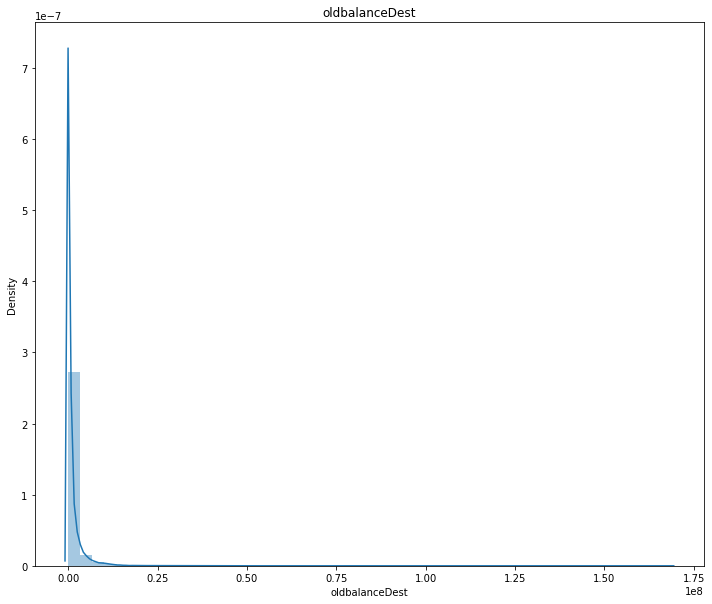

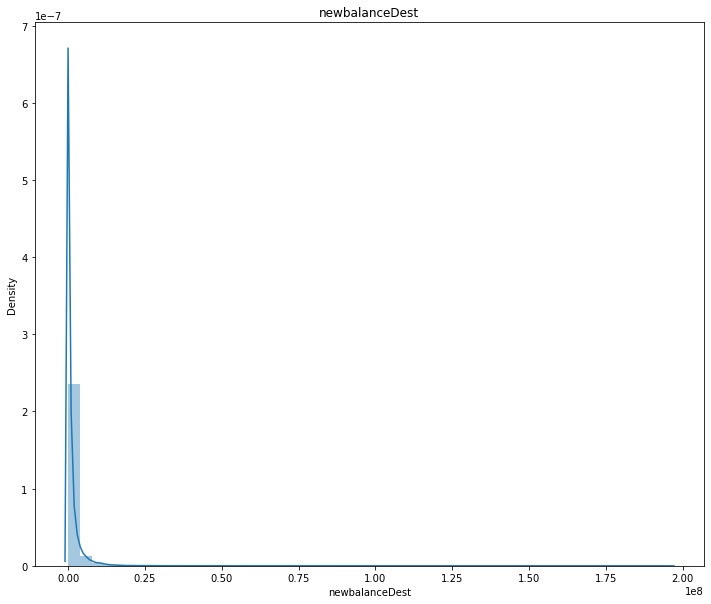

In [14]:
#showing distribution of numerical variables
for feature in numeric_features:
    plt.figure(figsize = (12, 10))
    sns.distplot(data[feature].sample(100000))
    plt.title(feature)
    plt.show()

above histogram shows the distribution of continuous variables. It is showing that features is not normally distributed and all the data is right screw. we have to apply logarithmic transformation.

## coverting data1 into logarithmic format Plotting Graph

In [15]:
data1 = data.copy()
#from numpy import ufunc
for feature in numeric_features:
    #coverting data1 into logarithmic format
    data1[feature] = np.log1p(data1[feature])

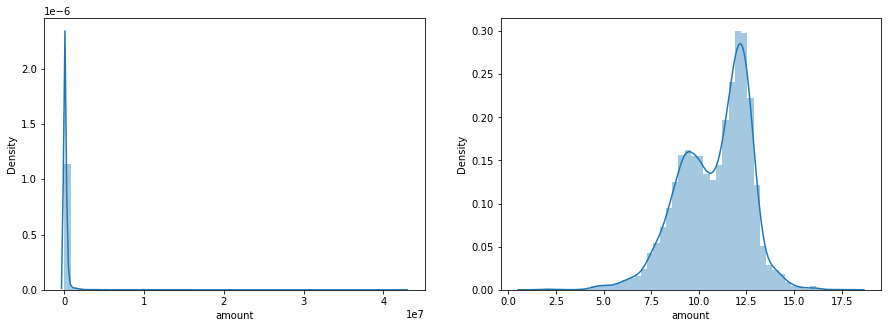

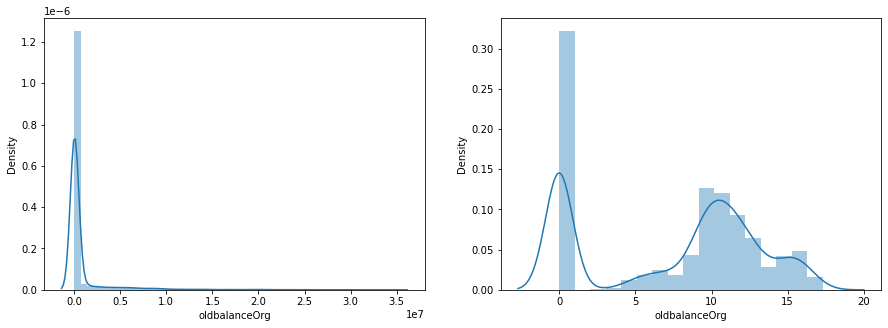

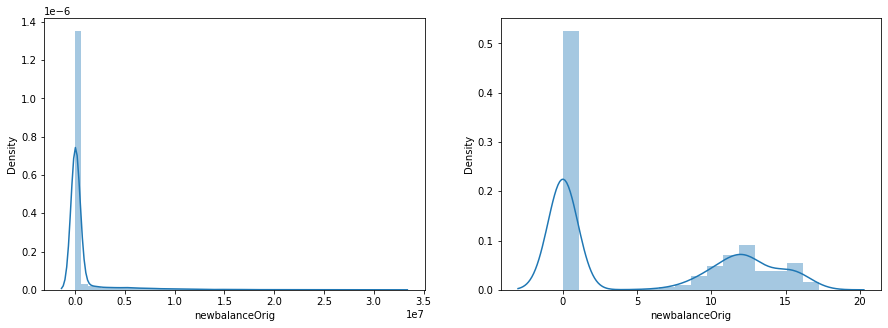

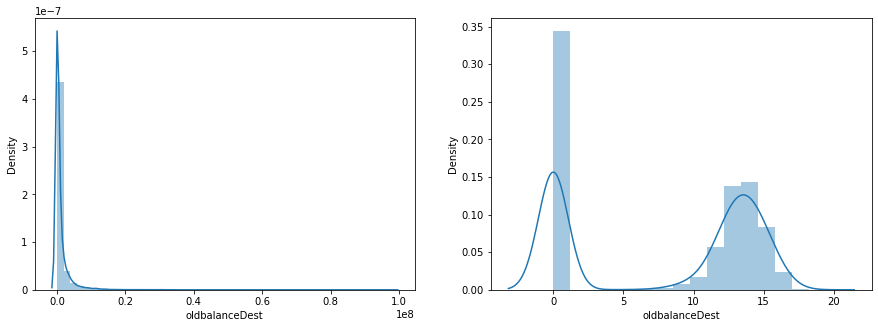

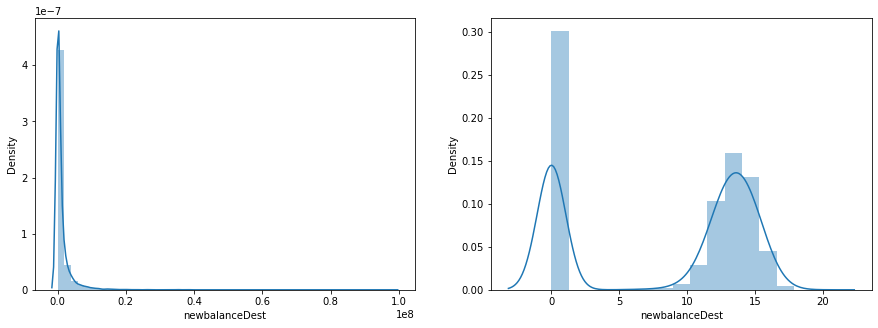

In [16]:
for feature in numeric_features:
    #before transformation
    plt.figure(figsize = (15, 5))
    plt.subplot(121)
    sns.distplot(data[feature].sample(10000))
    
    #after transformation
    plt.subplot(122)
    sns.distplot(data1[feature].sample(10000))
    plt.show()

In [17]:
data1.sample(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
1820147,163,CASH_IN,11.775822,16.592601,16.600661,14.143302,14.044899,0
1535392,154,CASH_OUT,12.075814,0.000000,0.000000,14.626854,14.701961,0
863043,42,PAYMENT,8.013039,0.000000,0.000000,0.000000,0.000000,0
4069880,300,CASH_IN,9.999907,15.292029,15.297047,11.361673,11.065694,0
3382290,255,DEBIT,9.470434,12.289585,12.228080,11.319505,11.465656,0
3241430,250,CASH_OUT,10.352658,9.969509,0.000000,11.114370,11.497488,0
2066625,181,CASH_IN,11.838678,15.756174,15.775870,14.880550,14.831627,0
2257620,187,CASH_OUT,10.845218,0.000000,0.000000,15.241993,15.254235,0
2634960,209,CASH_IN,12.202448,16.746047,16.756626,12.917650,12.246087,0
5118064,356,CASH_OUT,10.682726,0.000000,0.000000,11.898234,12.157943,0


## Multi-collinearity

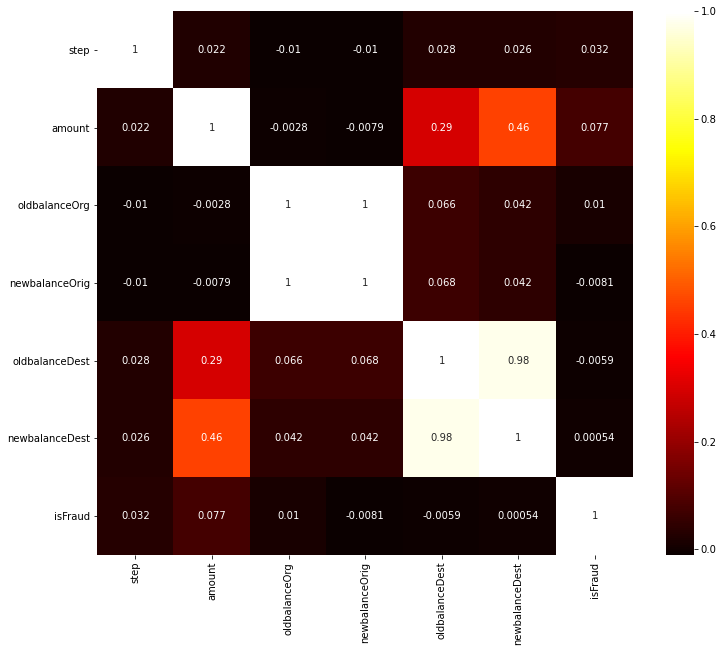

In [18]:
#finding correalation between numeric features
plt.figure(figsize = (12, 10))
cor = data.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.hot)
plt.show()

After look at above heatmap show correlation between features. 
'oldbalanceorg' and 'newbalanceOrig' repressents a very high which is equal to 1.
'oldbalanceDest' and 'newbalanceDest' repressents a very high which is nearly equal to 0.98.

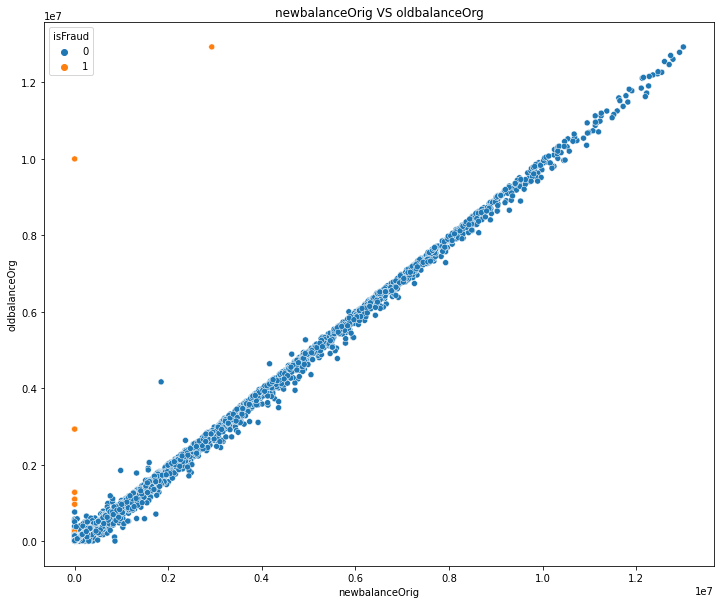

In [19]:
#showing sctterplot to find out the relation betweeen  'oldbalanceorg' and 'newbalanceOrig'
plt.figure(figsize = (12, 10))
sns.scatterplot(data['newbalanceOrig'].head(10000), data['oldbalanceOrg'].head(10000), hue = data['isFraud'].head(10000))
plt.title('newbalanceOrig VS oldbalanceOrg')
plt.show()

After studying above scatterplot. It is showing an overfittting.

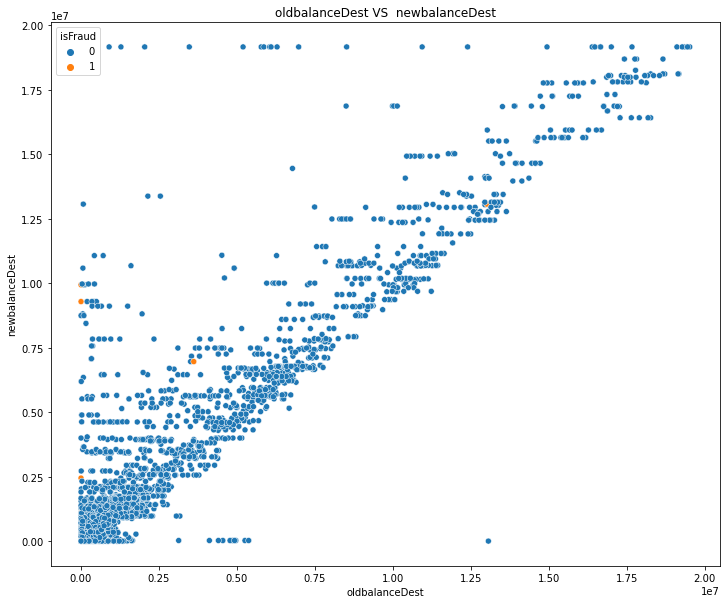

In [20]:
#showing sctterplot to find out the relation betweeen  'oldbalanceDest' and 'newbalanceDest'
plt.figure(figsize = (12, 10))
sns.scatterplot(data['oldbalanceDest'].head(10000), data['newbalanceDest'].head(10000), hue = data['isFraud'].head(10000))
plt.title('oldbalanceDest VS  newbalanceDest')
plt.show()

In [21]:
#splittig data 
X = data1.iloc[:, :-1]
y = data1.iloc[:, -1]

## Handling Categorical Data and Standardization of continuous features

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [23]:
#converting categorical data into numerical format for machine to better recognition
le = LabelEncoder()
le.fit(X['type'])
X['type'] = le.transform(X['type'])

In [24]:
#standardising nuerical continuous data for better model prediction and machine recognition 
sc = StandardScaler()
sc.fit(X.iloc[:,:-1])
X.iloc[:,:-1] = sc.transform(X.iloc[:,:-1])

# Impotancy of Independant Features Using Extra Trees Classifier
### For feature selection
In this step, we are going to find out how important is independant features while predicting dependant feature. 

In [25]:
data1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9.194276,12.044359,11.984786,0.000000,0.0,0
1,1,PAYMENT,7.531166,9.964112,9.872292,0.000000,0.0,0
2,1,TRANSFER,5.204007,5.204007,0.000000,0.000000,0.0,1
3,1,CASH_OUT,5.204007,5.204007,0.000000,9.960954,0.0,1
4,1,PAYMENT,9.364703,10.634773,10.305174,0.000000,0.0,0


In [26]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier()

In [27]:
model.feature_importances_

array([0.10090654, 0.13090851, 0.14750869, 0.25590484, 0.0463    ,
       0.05860593, 0.25986549])

In [28]:
imp_score = pd.DataFrame(model.feature_importances_, index = X.columns)
imp_score

,0
step,0.100907
type,0.130909
amount,0.147509
oldbalanceOrg,0.255905
newbalanceOrig,0.046300
oldbalanceDest,0.058606
newbalanceDest,0.259865


'oldbalanceOrg' column having very high correlation with 'newbalanceOrig', so avoid dublication we are removing column among them which feature has low importance according to "ExtraTreesClassifier".
so we are removing 'newbalanceOrig' feature.

In [29]:
#deleting less important columns to avoid multicollinearity
X.drop('oldbalanceOrg', axis = 1, inplace = True)

# train test split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

In [31]:
X_train.sample(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
4657776,0.608456,0.952399,-0.385845,0.319805,-0.847721,-1.144463,0.000000
4784939,0.657637,-1.269631,0.901802,1.469556,1.645780,0.775921,11.995049
5731782,1.093238,0.952399,-1.336340,0.493300,0.736778,-1.144463,0.000000
4055520,0.397681,-1.269631,0.617241,1.041195,1.292391,-1.144463,0.000000
2196741,-0.410289,-0.528954,0.607872,-1.307741,-0.847721,1.040960,14.805328
2423812,-0.290850,-0.528954,-0.407261,-1.307741,-0.847721,1.173230,15.642878
4517902,0.573327,-0.528954,0.664837,-0.500879,-0.847721,-1.144463,12.047226
22223,-1.653861,-0.528954,-0.755018,-1.307741,-0.847721,1.251936,16.255876
73754,-1.639809,-1.269631,0.985409,0.327088,1.152755,0.796276,12.108695
1172100,-0.782658,-0.528954,-1.967032,-0.162142,-0.847721,0.559711,11.513618


In [32]:
X_test.sample(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
1430976,-0.733477,-0.528954,0.776037,0.323308,-0.847721,0.845870,13.697745
5645448,1.072161,-1.269631,-0.129100,-0.399855,0.828552,1.275765,16.327546
5169593,0.805179,0.952399,-0.666181,0.714654,0.936237,-1.144463,0.000000
1141592,-0.789684,-1.269631,-1.131314,1.434265,1.608457,0.784661,13.002355
1494723,-0.712400,0.952399,-0.293344,-1.307741,-0.847721,-1.144463,0.000000
5279250,0.903541,-1.269631,0.717434,0.635292,1.114915,1.021510,14.465810
279639,-1.604680,0.952399,-0.689822,0.421829,0.443324,-1.144463,0.000000
2155350,-0.417315,0.952399,-0.921154,0.515388,0.726352,-1.144463,0.000000
4343290,0.453888,-0.528954,0.374468,0.457681,-0.847721,1.045690,14.816097
521655,-1.569551,0.952399,-0.918948,0.329401,0.259798,-1.144463,0.000000


In [33]:
y_train.sample(20)

2019901    0
3170524    0
4940318    0
5853104    0
1521586    0
1715423    0
5112267    0
1716655    0
628727     0
2148414    0
388309     0
1965200    0
856250     0
4462259    0
6190843    0
2479478    0
3652303    0
2375972    0
1702660    0
1753981    0
Name: isFraud, dtype: int64

In [34]:
y_test.sample(20)

6076031    0
5073769    0
5987115    0
3624468    0
4721250    0
1828986    0
1067015    0
3990304    0
541831     0
2009497    0
5925101    0
1113071    0
6013152    0
5473794    0
201276     0
3294707    0
3463404    0
5963435    0
329304     0
5347864    0
Name: isFraud, dtype: int64

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Model Prediction

In [37]:
#LogisitcRegression
y_pred = classifier.predict(X_test)

In [38]:
#decision Tree
y_pred_dt = dt_classifier.predict(X_test)

# Accuracy Checking

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

LogisitcRegression Accuracy Check

In [40]:
confusion_matrix(y_test, y_pred)

array([[1906233,      27],
       [   1237,    1289]], dtype=int64)

In [41]:
accuracy_score(y_test, y_pred)

0.9993377989989449

In [42]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00   1906260\n           1       0.98      0.51      0.67      2526\n\n    accuracy                           1.00   1908786\n   macro avg       0.99      0.76      0.84   1908786\nweighted avg       1.00      1.00      1.00   1908786\n'

DecisionTree Accuracy Check

In [43]:
confusion_matrix(y_test, y_pred_dt)

array([[1906003,     257],
       [    307,    2219]], dtype=int64)

In [44]:
accuracy_score(y_test, y_pred_dt)

0.999704524236871

In [45]:
classification_report(y_test, y_pred_dt)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00   1906260\n           1       0.90      0.88      0.89      2526\n\n    accuracy                           1.00   1908786\n   macro avg       0.95      0.94      0.94   1908786\nweighted avg       1.00      1.00      1.00   1908786\n'

# Conclussion

By comparing Logistic Regression Model performance with Decision Tree model, Decision tree model accuracy score higher which is 0.999704524236871 %. Also by checking confussion matrix, negatively false values are very lower in decision tree compare lagistic regression.
We will be select decision tree model